In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Could not locate executable g77
Could not locate executable f77
Could not locate executable ifort
Could not locate executable ifl
Could not locate executable f90
Could not locate executable DF
Could not locate executable efl


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v4.0.0


In [2]:
import pickle
y_obs = pickle.load(open("obs_blogisitcs", "rb"))
X_ = pickle.load(open("covariates_blogisitcs", "rb"))


In [3]:
with pm.Model() as manual_logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    # sig2 = pm.InverseGamma("sig2", 2, 10)
    # sig = pm.Deterministic("sig", 4**0.5)
    sig = 2
    beta_0 = pm.Normal('beta_0', 0, sigma=sig)
    beta_1 = pm.Normal('beta_1', 0, sigma=sig)
    beta_2 = pm.Normal('beta_2', 0, sigma=sig)
    beta_3 = pm.Normal('beta_3', 0, sigma=sig)
    # beta_5 = pm.Normal('beta_5', 0, sigma=sig)
    # beta_6 = pm.Normal('beta_6', 0, sigma=sig)
    # beta_7 = pm.Normal('beta_7', 0, sigma=sig)
    # beta_8 = pm.Normal('beta_8', 0, sigma=sig)
    # beta_9 = pm.Normal('beta_9', 0, sigma=sig)
    # beta_10 = pm.Normal('beta_10', 0, sigma=sig)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(beta_0 * X_[:,0]+ beta_1 * X_[:,1]    
                            + beta_2 * X_[:,2] + beta_3 * X_[:,3]
                            # + beta_5 * X_[:,4] + beta_6 * X_[:,5]
                            # + beta_7 * X_[:,6] + beta_8 * X_[:,7]
                            # + beta_9 * X_[:,8] + beta_10 * X_[:,9]
                            )

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=y_obs.flatten())

In [4]:
with manual_logistic_model:
    trace = pm.sample(tune=1000,
                         draws=10000,
                         chains=4,
                         init = 'adapt_diag',
                         cores=3)

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 36 seconds.


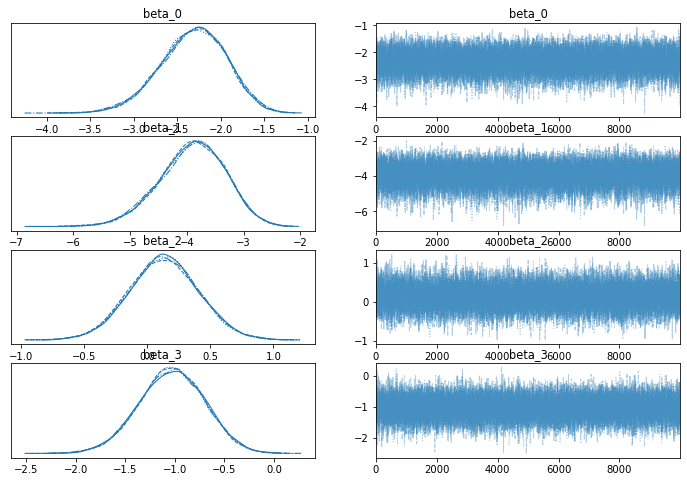

In [17]:
with manual_logistic_model:
    az.plot_trace(trace);